In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt



In [2]:
data = pd.read_excel('googNteslaNsp.xlsx',sheet_name='Stocks')

In [3]:
data

,Date,S&P,TSLA,GOOG,rf
0,2010-08-01,1107.530029,19.480000,224.169754,NaN
1,2010-09-01,1049.719971,20.410000,261.913300,NaN
2,2010-10-01,1143.489990,21.840000,305.704132,NaN
3,2010-11-01,1185.709961,35.330002,276.817413,NaN
4,2010-12-01,1186.599976,26.629999,295.875977,NaN
5,2011-01-01,1257.619995,24.100000,299.059052,NaN
6,2011-02-01,1289.140015,23.889999,305.554718,NaN
7,2011-03-01,1328.640015,27.750000,292.284454,NaN
8,2011-04-01,1329.479980,27.600000,271.034088,NaN
9,2011-05-01,1365.209961,30.139999,263.522247,NaN


In [4]:
data.index = data['Date']

In [5]:
data  = data[['GOOG','TSLA']]

In [6]:
returns_monthly  = data.pct_change()
returns_annual = (1+returns_monthly.mean())**12-1
returns_annual

GOOG    0.228637
TSLA    0.501833
dtype: float64

In [7]:
cov_monthly = returns_monthly.cov()
cov_annual = cov_monthly * 12
cov_annual

,GOOG,TSLA
GOOG,0.051786,0.001934
TSLA,0.001934,0.306175


In [8]:
w = np.array([.5] * 2)
w

array([0.5, 0.5])

In [9]:
returns = np.array(returns_annual)
covar = np.array(cov_annual)

In [10]:
return_p = w[0] * returns[0] + w[1] * returns[1]
var_p    = w[0]**2*covar[0,0] + w[1]**2*covar[1,1] + 2*w[0]*w[1]*covar[0,1]
sd_p     = np.sqrt(var_p)
rf       = 0.03 # assumed

In [11]:
sharpe_ratio = (return_p - rf)/sd_p
sharpe_ratio

1.1146194297153103

## Efficient Frontier

In [12]:
weights_0 = np.array(list(range(0,11)))/10
weights_1 = 1 - weights_0 
weights   = np.array([weights_0,weights_1]).T


In [13]:
weights

array([[0. , 1. ],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ]])

In [18]:
# port_returns = [np.matmul(w,returns.T) for w in weights]
port_returns = [w[0] * returns[0] + w[1] * returns[1] for w in weights]
# port_vars    = [np.matmul(np.matmul(w,covar),w.T) for w in weights]
port_vars    = [w[0]**2*covar[0,0] + w[1]**2*covar[1,1] + 2*w[0]*w[1]*covar[0,1] for w in weights]
port_sds     = [np.sqrt(v) for v in port_vars]

In [17]:
port_sds

[0.5533312185249796,
 0.4988668776834221,
 0.4456935499100345,
 0.3943338353980605,
 0.34559725342458286,
 0.3007617062327255,
 0.261838883330875,
 0.23182634069154692,
 0.21449745494863365,
 0.21297116858153212,
 0.22756566885420118]

In [20]:
def calc_SR(w,mu,Sigma,rf):
    return_p = np.matmul(w,mu.T)
    var_p    = np.matmul(np.matmul(w,Sigma),w.T)
    sd_p     = np.sqrt(var_p)
    return((return_p - rf)/sd_p)
port_SRs     = [calc_SR(w,returns,covar,rf) for w in weights]

In [21]:
port_SRs

[0.8527129639832048,
 0.8910455893378618,
 0.936054736992417,
 0.9886901687256571,
 1.049066247706022,
 1.1146194297153103,
 1.1759722818016851,
 1.2103702101826592,
 1.1807884824696282,
 1.0609724942631436,
 0.8728776205563732]

In [22]:
df = pd.DataFrame([port_returns,port_sds, port_SRs]).transpose()
df.columns=['Returns', 'Volatility', 'Sharpe Ratio']
df

,Returns,Volatility,Sharpe Ratio
0,0.501833,0.553331,0.852713
1,0.474513,0.498867,0.891046
2,0.447194,0.445694,0.936055
3,0.419874,0.394334,0.988690
4,0.392554,0.345597,1.049066
5,0.365235,0.300762,1.114619
6,0.337915,0.261839,1.175972
7,0.310596,0.231826,1.210370
8,0.283276,0.214497,1.180788
9,0.255957,0.212971,1.060972


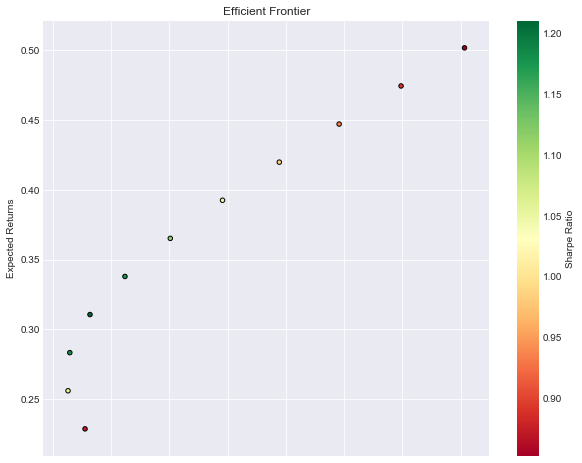

In [23]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()